### Text Mining Homework 5

Regarding first 2,000 overviews of movie review data (movies_metadata.csv), after undergoing the following preprocessing, you want to do cluster analysis for movie titles. Create a TF-IDF vector using the method below and answer the questions below

```
[Preprocessing]
[Step 1] Null Remove row with value
[Step 2] Convert non-alphabetic characters to spaces
[Step 3] Convert to lower case
[Step 4] Create TF-IDF considering stopwords
```

#### Problem 1

Please answer the questions below regarding the movie [Jumanji]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../Data/movies_metadata.csv', engine = 'python')
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Check if there is null in building TF-IDF

In [2]:
data['overview'].isnull().sum()

954

Remove Null from overview

In [3]:
data['overview'] = data['overview'].fillna('')  # fillna(""): delete null
data['overview'].isnull().sum() #  Null check again

0

In [4]:
data = data[:2000] # select 2000 review data
titles = data['original_title']
synopses = data['overview']

Vectorize using TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(data['overview'])

make movie indeces

In [6]:
indices = pd.Series(data.index, index = data['title']).drop_duplicates()

**1.1**  Find how many movies are in the same cluster as the movie jumanji using Euclidean similarity and K-means (k=10) method.

In [7]:
from sklearn.cluster import KMeans

num_cluster = 10
kmeans_model = KMeans(n_clusters = num_cluster, 
                      random_state = 42)

%time kmeans_model.fit(tfidf_matrix)

/Users/junghunlee/anaconda3/envs/Webscraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: user 1.51 s, sys: 626 ms, total: 2.14 s
Wall time: 389 ms


KMeans(n_clusters=10, random_state=42)

Kmeans clusters set a distance as euclidean to default. and now, we check a clustered labels.

In [8]:
clusters = kmeans_model.labels_.tolist()
clusters[:10]

[8, 2, 2, 1, 0, 8, 7, 2, 1, 6]

In [9]:
films = {'title': titles, 
         'synopsis': synopses, 
         'cluster': clusters}
frame = pd.DataFrame(films)
frame['cluster'].value_counts(films)

cluster
6    0.2220
8    0.1200
7    0.1140
2    0.0950
3    0.0920
4    0.0905
1    0.0805
5    0.0740
0    0.0670
9    0.0450
Name: proportion, dtype: float64

**1.2** Find how many movies are in the same cluster as the movie Jumanji using Euclidean similarity and hierarchical clustering (ward, k=10) method.

In [10]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters = num_cluster,
                                      metric = 'euclidean',
                                      linkage = 'ward')
%time agg_cluster.fit(tfidf_matrix.toarray())

CPU times: user 8.13 s, sys: 491 ms, total: 8.62 s
Wall time: 7.98 s


AgglomerativeClustering(metric='euclidean', n_clusters=10)

In [11]:
result1 = agg_cluster.fit_predict(tfidf_matrix.toarray())

In [13]:
films = {'title': titles, 
         'synopsis': synopses, 
         'cluster': result1}
frame = pd.DataFrame(films)
frame['cluster'].value_counts(films)

cluster
3    0.7875
4    0.1275
0    0.0330
1    0.0160
2    0.0105
8    0.0090
5    0.0070
6    0.0040
9    0.0035
7    0.0020
Name: proportion, dtype: float64

**1.3** Recommend 3 movies that are closest to the movie Jumanji using cosine similarity 

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [16]:
def get_recommendations(title, 
                        cosine_sim = cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:10]  
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

print(get_recommendations('Jumanji')[1:4])

1506    The Innocent Sleep
8             Sudden Death
363               Maverick
Name: title, dtype: object


#### Problem 2

We intend to analyze using a topic model based on LDA . Here, the max features of the TF -IDF vector are limited to 1000 and applied. Answer the questions below

In [17]:
import urllib.request
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

vectorizer = TfidfVectorizer(stop_words = 'english', 
                             max_features = 1000)
X = vectorizer.fit_transform(frame['synopsis'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**2.1** Apply the topic model of the Sklearn library to find where the first document falls under topics 0 to 9. Apply (designate 10 topics , random state = 777, learning method = online, max iter = 5)

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(
    n_components = 10,
    learning_method = 'online',
    random_state = 777,
    max_iter = 5
)

%time lda_top = lda_model.fit_transform(X)

CPU times: user 483 ms, sys: 6.38 ms, total: 490 ms
Wall time: 499 ms


**2.2** Print the top 5 words for each of the 10 topics

In [22]:
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), 
              [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('killer', 9.31), ('serial', 8.08), ('murder', 5.52), ('murders', 4.73), ('police', 4.61)]
Topic 2: [('professor', 8.84), ('date', 4.97), ('friends', 4.32), ('recently', 4.22), ('given', 4.17)]
Topic 3: [('life', 43.14), ('young', 42.93), ('new', 39.53), ('family', 38.06), ('love', 35.09)]
Topic 4: [('disney', 5.5), ('freddy', 4.27), ('hollywood', 3.76), ('fred', 3.71), ('manhattan', 3.68)]
Topic 5: [('max', 8.25), ('agent', 6.66), ('people', 6.25), ('stop', 6.06), ('computer', 5.97)]
Topic 6: [('coach', 4.99), ('basketball', 3.66), ('fashion', 3.53), ('game', 3.09), ('team', 3.02)]
Topic 7: [('smith', 3.35), ('vacation', 2.86), ('violent', 1.11), ('pair', 0.41), ('killers', 0.4)]
Topic 8: [('planet', 6.27), ('alex', 5.73), ('alien', 5.19), ('space', 4.9), ('earth', 4.75)]
Topic 9: [('experience', 3.79), ('anne', 2.06), ('park', 1.62), ('la', 1.02), ('hope', 0.75)]
Topic 10: [('king', 7.24), ('texas', 6.83), ('eddie', 5.35), ('charles', 3.74), ('lucy', 3.0)]


**2.3** Use the show_perflexity function of the lecture notes to create a graph with the number of topic candidates from 2 to 30

In [27]:
def show_perplexity(vectorizer, 
                    start = 1, 
                    end = 30, 
                    max_iter = 5, 
                    topic_word_prior = 0.1,
                    doc_topic_prior = 1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter = max_iter,
                                        topic_word_prior = topic_word_prior,
                                        doc_topic_prior =doc_topic_prior,
                                        learning_method = 'batch', n_jobs = -1,
                                        random_state = 7)
        lda.fit(vectorizer)
        iter_num.append(i)
        pv = lda.perplexity(vectorizer)
        per_value.append(pv)
        # print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

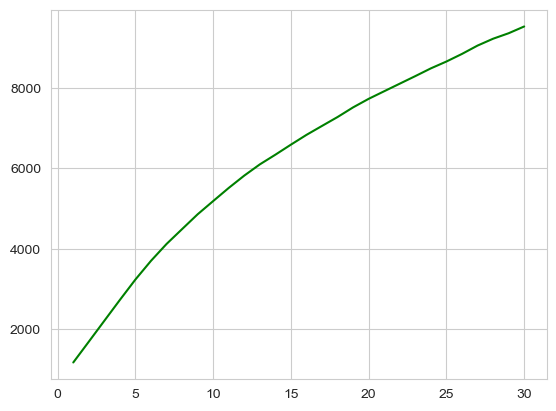

1

In [28]:
show_perplexity(X)